In [579]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers import Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [580]:
f= open('/Users/avantika/Desktop/fer2013 2.csv') 

In [581]:
#p=f.readline() #reads first line/ the headers

In [582]:
#print(p) #labels/columns, just to see the column names

In [583]:
data= f.readlines() #reads all the lines in the csv file
data_lines= np.array(data) #makes a numpy array of those lines

In [584]:
#Pre-processing the data
(x_train,y_train)= ([],[]) 
(x_test, y_test)= ([],[])
for i in range(1,data_lines.size):
    emotion, image, usage= data_lines[i].split(",") #extracting info line by line
    pixels= image.split(' ') 
    pixels= np.array(pixels,'float32');
    emotion = to_categorical(emotion, 7)
    if(usage =='Training\n'): #Training set 
        x_train.append(pixels)
        y_train.append((emotion))
    elif (usage=='PublicTest\n'): #Test set
        x_test.append(pixels)
        y_test.append((emotion))


In [585]:
#Building CNN model with 3 convolution layers
model= Sequential()

#Layer 1 of convolution + pooling
model.add(Conv2D(128,(5,5), activation='relu', input_shape= (48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2,2)))

#Layer 2 of convolution + pooling
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#Layer 3 of convolution + pooling
model.add(Conv2D(32,(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(3,3)))

#Fully connected layer
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

#Softmax function to generate probablilities of each category of output possible
model.add(Dense(7, activation='softmax'))

In [586]:
x_train=np.array(x_train,'float32') #converting input training images to numpy array
x_test=np.array(x_test,'float32')#converting input testing images to numpy array
x_train= x_train/255
x_test=x_test/255
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1).astype('float32')#converting the image 1D array to 2D 48x48 array of pixels
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1).astype('float32')#converting the image 1D array to 2D 48x48 array of pixels

In [587]:
y_train=np.array(y_train,'float32') #converting output training labels to numpy array
y_test=np.array(y_test,'float32')#converting output testing labels to numpy array

In [588]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator() #uses random training sets instead of all training sets to save time

train_generator = gen.flow(x_train, y_train, batch_size=125) #bigger batch size->more accuracy
 
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
#model.fit_generator(x_train, y_train, epochs=epochs) 
model.fit_generator(train_generator, steps_per_epoch=125, epochs=30) #200,5

Epoch 1/30
125/125 [==============================] - 93s 742ms/step - loss: 1.8201 - accuracy: 0.2515
Epoch 2/30
125/125 [==============================] - 97s 775ms/step - loss: 1.7943 - accuracy: 0.2525
Epoch 3/30
125/125 [==============================] - 92s 739ms/step - loss: 1.7138 - accuracy: 0.3007
Epoch 4/30
125/125 [==============================] - 93s 746ms/step - loss: 1.5939 - accuracy: 0.3642
Epoch 5/30
125/125 [==============================] - 96s 765ms/step - loss: 1.5285 - accuracy: 0.4054
Epoch 6/30
125/125 [==============================] - 100s 804ms/step - loss: 1.4801 - accuracy: 0.4282
Epoch 7/30
125/125 [==============================] - 93s 741ms/step - loss: 1.4353 - accuracy: 0.4482
Epoch 8/30
125/125 [==============================] - 94s 753ms/step - loss: 1.4028 - accuracy: 0.4625
Epoch 9/30
125/125 [==============================] - 100s 797ms/step - loss: 1.3757 - accuracy: 0.4692
Epoch 10/30
125/125 [==============================] - 95s 756ms/step -

In [589]:
train_score = model.evaluate(x_train, y_train, verbose=0)


In [590]:
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

Train loss: 1.1026792882266034
Train accuracy: 58.26047658920288


In [591]:
test_score = model.evaluate(x_test, y_test, verbose=0)

In [592]:
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Test loss: 1.2568140141178088
Test accuracy: 52.18724012374878


In [603]:
from keras.preprocessing.image import image

#load the image from its source path
input_image = image.load_img("/Users/avantika/Desktop/surpised.png", grayscale=True, target_size=(48, 48))

#convert image to numpy array and expand its dimensions
x = image.img_to_array(input_image)
x = np.expand_dims(x, axis = 0)
 
#Normalize image array
x /= 255

#Use CNN model to preidct emotion for image input
custom = model.predict(x)

#Printing the output in readable format

objects = ('angry', 'disgusted', 'scared', 'happy', 'sad', 'surprised', 'neutral')
max_y= np.argmax(custom)
print("Emotion sensed for the face: ", objects[max_y])



Emotion sensed for the face:  surprised


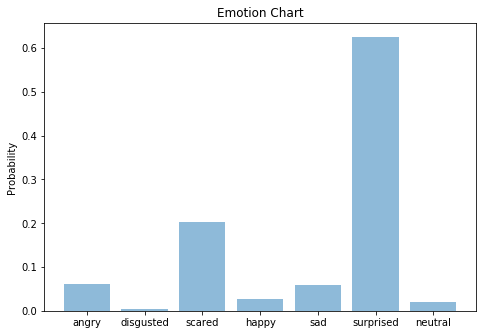

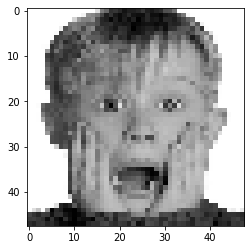

In [604]:
#Plotting the emotion profile for detailed results
range_y= np.arange(len(objects))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range_y, custom[0], align='center', alpha=0.5)
plt.xticks(range_y, objects)
plt.ylabel('Probability')
plt.title('Emotion Chart')
plt.show()

#reconverting input to numpy array to display it using imshow()
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()